# t検定
２群間の平均値の差の検定の行います。
このノートには、「1.対応のない2標本t検定」と「2.対応のある2標本t検定」の２つの事例を、それぞれ異なるサンプルデータを使って紹介しています。

汎用性の高い事例となるように、CSVデータを読み込んでから、検定に使えるデータに加工するという手順を踏んでいます。

このサンプルを参考に、自分でも様々なデータを使って検定を行なってみてください。
異なる条件が与えられた２つのグループ間に「差がある」ということがわかるだけで、学術論文が書けます。

付記：t検定の仮定として、データは以下の仮定を満たすものと見做します
* データが正規分布に従っている（正規性の仮定）
* 二群の分散が等しい（等分散性の仮定）


## 0. はじめに必要なライブラリを読み込みます

In [78]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from scipy import stats

## 1. 対応のない t 検定

２つのグループ間には対応がない場合の検定です。  


### 1.1. サンプルデータの読み込み

統計学習のサンプルとして有名な iris.csv を使います。Irisは日本語で「アヤメ」。このデータセットには、setosa、versicolor、virginicaという3種の花に着目して、がく片（sepal）の長さ・幅、および花弁（petal）の長さ・幅を、それぞれ 50個体について測定しています。
* http://archive.ics.uci.edu/dataset/53/iris
* https://raw.githubusercontent.com/koichi-inoue/DataScience/main/iris.csv



In [79]:
# サンプルデータ iris.csv の読み込み
df = pd.read_csv('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### 1.2. 比較するデータの準備
Versicolor種とVirginica種とで、「がく」の幅に差があるかを比較するために、上記のCSVファイルから、必要な部分のみを抽出します。

In [80]:
# Versicolor種の sepal.width（がくの幅）を df1 に抽出します
df1 = df.query( ' variety == "Versicolor" ')['sepal.width']
df1.head()

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
Name: sepal.width, dtype: float64

In [81]:
# Virginica種の sepal.width（がくの幅）を df2 に抽出します
df2 = df.query( ' variety == "Virginica" ')['sepal.width']
df2.head()

100    3.3
101    2.7
102    3.0
103    2.9
104    3.0
Name: sepal.width, dtype: float64

### 1.3. データをプロットして視覚的に確認
データの正規性や等分散性を簡易的に確認

<Axes: >

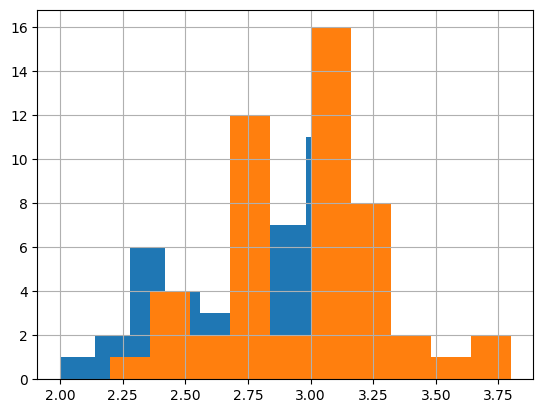

In [82]:
df1.hist()
df2.hist()

### 1.4. データフォーマットの変換
統計ライブラリの関数を利用するために DataFrame を NumPy配列（ndarray）に変換します。

In [83]:
d1 = df1.values
print(type(d1))
print(d1)

<class 'numpy.ndarray'>
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]


In [84]:
d2 = df2.values
print(type(d2))
print(d2)

<class 'numpy.ndarray'>
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]


### 1.5. t検定

scipy.stats の関数を使います。  
対応のないt検定では、ttest_ind() 関数を使って、Welchのt検定を使います。
* 等分散性があると仮定できる場合は、equal_var = Truth
* 等分散性があると仮定できない場合は、equal_var = False

In [86]:
# 対応のない検定は ttest_ind()
t, p = stats.ttest_ind(d1, d2, equal_var=True)

print('Welchのt検定｜対応なし')
print(f'p値 = {p:.5f}')
print(f't値 = {t:.3f}')

Welchのt検定｜対応なし
p値 = 0.00182
t値 = -3.206


実行例の場合、p<0.05 で「有意差あり」（帰無仮説は棄却）と判定されます。

## 2. 対応のある t 検定
２つのグループ間に対応がある場合（例えば、同一被験者に対して、２種類の異なる投薬を行なった場合の比較）の検定の事例です。

### 2.1. サンプルデータの読み込み

サンプルとして 統計ソフト R のデータセットに含まれる sleep.csv を使います。  
薬剤1と薬剤2の2種類の睡眠薬を10人の被験者に投与した際の、睡眠時間の差分を記録したデータで、2種類の薬剤を同一被験者に投与していることから、その値には対応があるといえます。
* https://rpubs.com/seafoam33/sleep1
* https://raw.githubusercontent.com/koichi-inoue/DataScience/main/sleep.csv

In [87]:
# サンプルデータ sleep.csv の読み込み
df = pd.read_csv('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/sleep.csv')
df

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


### 2.2. データの準備

In [88]:
# group = 1 の extra（差分値）を df1 に抽出します
df1 = df.query( ' group == 1 ')['extra']
df1

0    0.7
1   -1.6
2   -0.2
3   -1.2
4   -0.1
5    3.4
6    3.7
7    0.8
8    0.0
9    2.0
Name: extra, dtype: float64

In [89]:
# group = 2 の extra（差分値）を df2 に抽出します
df2 = df.query( ' group == 2 ')['extra']
df2

10    1.9
11    0.8
12    1.1
13    0.1
14   -0.1
15    4.4
16    5.5
17    1.6
18    4.6
19    3.4
Name: extra, dtype: float64

### 2.3. データをプロットして視覚的に確認
ここでは「箱ひげ図」を使ってみます。  
データ数が少ないので何とも言えませんが、正規性があると仮定します。  
直感的には２つのグループには差があると感じられます。

<Axes: title={'center': 'extra'}, xlabel='group'>

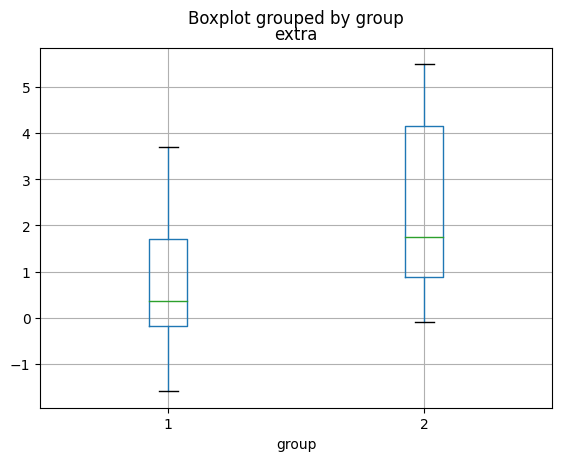

In [90]:
df.boxplot( column='extra' , by='group' )

###2.4. データフォーマットの変換
統計ライブラリの関数を利用するために DataFrame を NumPy配列（ndarray）に変換します。

In [91]:
d1 = df1.values
print(type(d1))
print(d1)

<class 'numpy.ndarray'>
[ 0.7 -1.6 -0.2 -1.2 -0.1  3.4  3.7  0.8  0.   2. ]


In [92]:
d2 = df2.values
print(type(d2))
print(d2)

<class 'numpy.ndarray'>
[ 1.9  0.8  1.1  0.1 -0.1  4.4  5.5  1.6  4.6  3.4]


### 2.5. t検定
scipy.stats の関数を使います。  
対応のある検定は ttest_rel() 関数を使って Studentのt検定を使います。


In [93]:
# 対応のある検定は ttest_rel
t, p = stats.ttest_rel(d1, d2)

print('Studentのt検定｜対応あり')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')

Studentのt検定｜対応あり
p値 = 0.003
t値 = -4.06


実行例の場合、p<0.05 で「有意差あり」（帰無仮説は棄却）と判定されます。